##Customer Segmentation

In today's business landscape, customer satisfaction is paramount. However, it's important to acknowledge that it's impossible to please everyone, and this is a reality that must be accepted. It's crucial to recognize this early on, as it will serve you and your business well.

That's why business analysts typically start by segmenting customers (both current and potential) into groups based on their needs, wants, and shared characteristics. By understanding the preferences of your customers, you can develop tailored strategies to attract them and provide them with the best possible products and services.

There are various methods for segmenting customers, including hierarchical clustering, Recency Frequency & Monetary (RFM) segmentation, and K-means clustering, among others.

In this notebook, you will be dealing with transactional and customer datasets to do customer segmentation on different levels.

The challenge for the busineses that we will be dealing with in this notebook is to divide their customers into groups based on both their personalities (demographics) and their spending behaviors. This approach can offer valuable insights into the characteristics and habits of their customer base.

We will be utilizing a variety of tools and libraries, including:

* Pandas for importing and manipulating data in a dataframe format
* Numpy and Scipy for performing essential mathematical calculations
* Scikit-Learn for constructing our Customer Segmentation Model
* Seaborn, Matplotlib, and Plotly Express for creating compelling visualizations of our data.

In [1]:
#Imports

#pandas for data manipulation
import pandas as pd

#numpy and Scipy for mathematical calculations
import numpy as np
from scipy import stats

#scikit-Learn for constructing the Customer Segmentation Model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#seaborn, Matplotlib, and Plotly Express for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#setting seaborn and matplotlib defaults for visualizations
sns.set(style="whitegrid")
plt.style.use('seaborn')


<ipython-input-1-231fdb80854d>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#Read the dataset attached with this mini-project
#dataset name: Dataset1_customer_segment

df = pd.read_csv('Dataset1_customer_segment.csv')

In [3]:
#of course run .head() to check the first 5 rows in the data
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  TotalAmountSpent  \
0  5524        1957  Graduation         Single  58138.0              1617   
1  2174        1954  Graduation         Single  46344.0                27   
2  4141        1965  Graduation       Together  71613.0               776   
3  6182        1984  Graduation       Together  26646.0                53   
4  5324        1981         PhD        Married  58293.0               422   

   Kidhome  Teenhome Dt_Customer  Recency  
0        0         0      4/9/12       58  
1        1         1      8/3/14       38  
2        0         0  21-08-2013       26  
3        1         0     10/2/14       26  
4        1         0  19-01-2014       94  


The dataset has the following features:

* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* Recency - number of days since the last purchase
* TotalAmountSpent

In [4]:
#use .describe() to know more about your data
print(df.describe())

                 ID   Year_Birth         Income  TotalAmountSpent  \
count   2240.000000  2240.000000    2216.000000       2240.000000   
mean    5592.159821  1968.805804   52247.251354        605.798214   
std     3246.662198    11.984069   25173.076661        602.249288   
min        0.000000  1893.000000    1730.000000          5.000000   
25%     2828.250000  1959.000000   35303.000000         68.750000   
50%     5458.500000  1970.000000   51381.500000        396.000000   
75%     8427.750000  1977.000000   68522.000000       1045.500000   
max    11191.000000  1996.000000  666666.000000       2525.000000   

           Kidhome     Teenhome      Recency  
count  2240.000000  2240.000000  2240.000000  
mean      0.444196     0.506250    49.109375  
std       0.538398     0.544538    28.962453  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000    24.000000  
50%       0.000000     0.000000    49.000000  
75%       1.000000     1.000000    74.000000  
ma

##EDA

An effective EDA always has three stages:

1. Univariate Analysis
2. Bivariate Analysis.
3. Multivariate Analysis.

###Univariate Analysis

To gain an understanding of a specific feature, univariate analysis involves analyzing it in isolation. Therefore, as part of the exploratory data analysis (EDA) process, the first step is typically to perform univariate analysis by examining the descriptive or summary statistics associated with the feature.
For instance, one might explore a feature's distribution or proportion. In our particular case, we will be examining the age distribution of the customers included in the dataset.

In [5]:
#first of all, lets convert 'Year_Birth' to an 'Age' feature
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

#print the first few rows to verify the Age column
print(df[['Year_Birth', 'Age']].head())


   Year_Birth  Age
0        1957   67
1        1954   70
2        1965   59
3        1984   40
4        1981   43


In [6]:
#descriptive statistics for the 'Age' feature to perform univariate analysis
print(df['Age'].describe())

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64


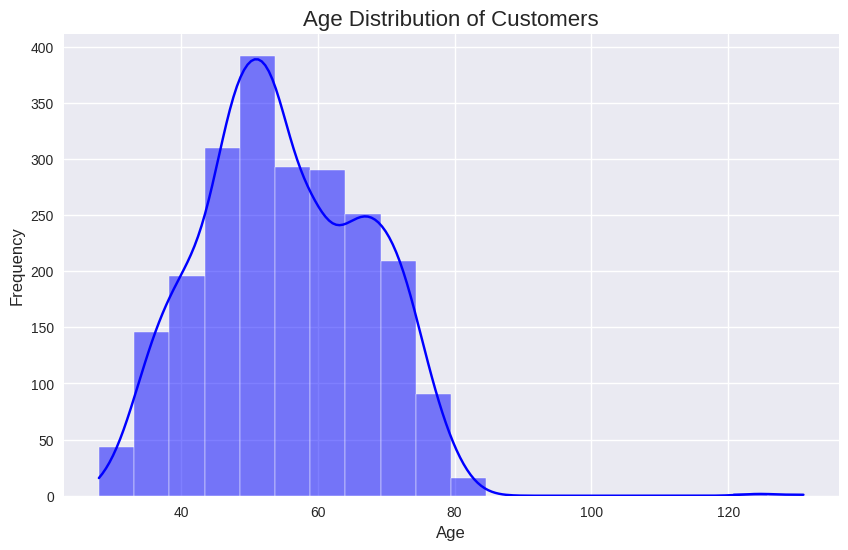

In [7]:
#plot a histogram that shows the distribution of ages
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Customers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


*What is your finding?* *Answer here*

**Answer**:

Peak Age Group: The majority of customers are in the 40-60 age range, with a noticeable peak occurring in the mid 40s to early 50s, suggesting that this is the most prevalent age range.

Skewness: The distribution is right-skewed, with a higher proportion of clients in the younger to medium age range than in the older age range. After sixty, the frequency gradually decreases.

Outliers: A very tiny percentage of the dataset's clients are older than 80 years old, but they do exist.

According to this data, the company mostly serves middle-aged clients; younger and far fewer elderly clients are drawn to the establishment.



<ipython-input-8-0882f8fb4706>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='Set2')


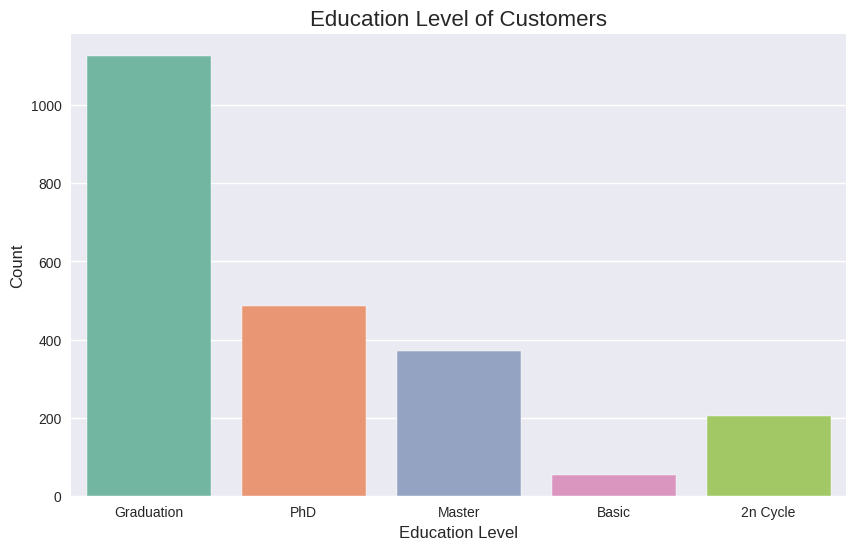

In [8]:
#Draw a plot diagram for the education level of customers

plt.figure(figsize=(10, 6))

#count the occurrences of each education level and plot a bar chart
sns.countplot(data=df, x='Education', palette='Set2')
plt.title('Education Level of Customers', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


*Please comment here*

**Answer**:

Graduation Predominates: Over 1000 clients have completed their education to the graduation level, making up the bulk of this group. This suggests that the company probably draws intelligent people.

PhD and Master Levels: A substantial percentage of clients own PhD and Master's degrees; both customer groups are sizable, although much smaller than the Graduation category. There are somewhat more PhD holders than Master's degree holders.

Lower Education Levels: Compared to other groups, a very small percentage of customers merely possess a basic education. As a lesser percentage of the total, individuals in the "2nd Cycle" are likewise represented.

In summary, the vast majority of the customers is highly educated, with many holding at least a bachelor's degree. This may indicate that the company focuses more on or targets educated individuals.



In [9]:
#What about the marital status of your customers?
#Plot a bar graph to see the different distribution of customers
#Try using plotly here since it is more interactive


#count the occurrences of each marital status
Marital_Status_counts = df['Marital_Status'].value_counts()

#create a bar plot using Plotly Express
fig = px.bar(Marital_Status_counts,
             x=Marital_Status_counts.index,
             y=Marital_Status_counts.values,
             labels={'x': 'Marital Status', 'y': 'Count'},
             title='Marital Status Distribution of Customers')

fig.show()


**Comment on the Marital Status Graph:**

Married consumers: With almost 900 people in this category, married consumers make up the largest group by far. This implies that married people make up a sizable share of the customers.

Together and Single: These are the next two most significant categories. "Together" may stand for individuals who are in a relationship but are not legally married; this category includes about 600 consumers. Another significant chunk is represented by the "Single" category, which has about 500 consumers.

Widow and Divorced: The number of widowed and divorced clients is lower; "Divorced" has a far higher count than "Widow." This suggests that the organization doesn't work with as many clients who have ended their marriages due to divorce or losing a spouse.

Other Categories: There are a few odd or uncommon categories, such as "Alone," "Absurd," and "YOLO," however they only make up a tiny percentage of the customers and could be the result of data input errors or outliers.


In summary, Most clients are married or in committed partnerships, with a small number of single and divorced individuals. Unconventional categories like "YOLO" and "Absurd" suggest more research on data quality.

In [10]:
#Income! A very important feature.
#Plot a bar graph to show the distribution

#create a histogram to show the distribution of Income
fig = px.histogram(df,
                   x='Income',
                   nbins=20, #nb of bins
                   title='Income Distribution of Customers',
                   labels={'Income':'Customer Income'},
                   color_discrete_sequence=['blue'])
fig.show()

*Provide an analysis of the above findings*

**For the Income distribution:**

Most Customers Have Lower Incomes: As the broad bar on the left-hand side of the graphic indicates, the majority of customers have incomes that are concentrated below 100k. This suggests that the bulk of the customers is from lower-class backgrounds.

Few High-Income Clients: The higher income groups are linked to an extremely small number of clients. There are very few consumers with earnings over 100k, and very few have incomes of 200k or more. This implies that there are not many wealthy people in this dataset.

Distribution of Income: The income distribution is biased to the right, with a lengthy tail that extends toward higher incomes and a significant concentration of consumers in the lower income range. This skewness suggests that although there are a small number of wealthy clients, they are quite rare.


In summary, the company primarily serves the middle-class clients, with few high-income individuals included in the dataset, suggesting a need to focus on this skewed income distribution.

In [11]:
#What is the distribution for the TotalAmount Spent?
#Do a histogram that shows this information

fig = px.histogram(df,
                   x='TotalAmountSpent',
                   nbins=20,
                   title='Total Amount Spent Distribution of Customers',
                   labels={'TotalAmountSpent':'Total Amount Spent'},
                   color_discrete_sequence=['green'])

fig.show()

**Comment on the Total Amount Spent Distribution:**

Most Consumers Spend Less: Most consumers have spent less than 500. The big bar on the chart's left side serves as an indicator of this. The majority of the customers is in this lower cost range.

Fewer High Spenders: The number of clients dramatically declines as the overall amount spent rises. Fewer than 1% of clients have made purchases of more than 1000, and even fewer have spent more than 2000.

Long Tail: Although there is a long tail leading to greater expenditure levels, these clients are not common. The percentage of customers with higher spending ranges (over 1500) is quite minimal.


In summary, the business primarily serves low-spending customers under 500, with a gradual decrease in high-spending customers. Strategies to engage higher spenders or convert low-spending customers into high-value ones may be considered.

###Bivariate Analysis

Once you have completed the univariate analysis on all the features you're interested in, the subsequent step is to conduct bivariate analysis which involves examining two attributes simultaneously. Bivariate analysis involves assessing the relationship between two features, such as their correlation.
In our project, we will perform various bivariate analyses, such as examining the average total expenditure among different age groups of clients, establishing a correlation between customer income and total expenditure, and so forth.

In [12]:
#Is there any relation between Customer's Income and TotalAmountSpent?
# Draw a scatter plot to answer the above question

fig = px.scatter(df,
                 x='Income',
                 y='TotalAmountSpent',
                 title='Relationship between Customer Income and Total Amount Spent',
                 labels={'Income': 'Customer Income', 'TotalAmountSpent': 'Total Amount Spent'},
                 trendline="ols",  #will add a trendline to better observe the correlation
                 color_discrete_sequence=['blue'])
fig.show()


**Comment on the relationship between Income and Total amount spent:**

Positive Correlation: the total amount spent and income appear to be positively correlated. There is a typical tendency for the total amount spent to rise as the customer's income does. This is demonstrated by the trendline's rising slope.

Clustered Data: The majority of the data points are concentrated in the lower income brackets (below 100k), and the associated total expenditure is often less than 2k. This implies that this income range and expenditure level are occupied by the majority of clients.


Outliers: A small percentage of consumers have incomes that are considerably greater than the average (above 300k) and spending that is proportionately higher (up to 10k). The plot demonstrates that although income tends to affect expenditure, most consumers don't show exceptionally high spending, even in cases where their income is higher.


In summary, the study reveals a positive correlation between customer income and total spending, with most customers falling within lower income and spending ranges.

Of course, you noticed from the above scatterplot that some cleaning is required. Please feel free to clean the data before continuing.  

In [13]:
#Now, we will perform some data cleaning steps before proceeding to the next steps.

#lets check for missing values in Income and TotalAmountSpent
print(df[['Income', 'TotalAmountSpent']].isnull().sum())

#also, lets drop rows with missing values in Income or TotalAmountSpent
df_cleaned = df.dropna(subset=['Income', 'TotalAmountSpent'])

#moreover, remove outliers using the InterQuartile Range (IQR) method
Q1 = df_cleaned[['Income', 'TotalAmountSpent']].quantile(0.25)
Q3 = df_cleaned[['Income', 'TotalAmountSpent']].quantile(0.75)
IQR = Q3 - Q1

#filter out data points that are outliers (beyond 1.5*IQR)
df_cleaned = df_cleaned[(df_cleaned['Income'] >= (Q1['Income'] - 1.5 * IQR['Income'])) &
                        (df_cleaned['Income'] <= (Q3['Income'] + 1.5 * IQR['Income'])) &
                        (df_cleaned['TotalAmountSpent'] >= (Q1['TotalAmountSpent'] - 1.5 * IQR['TotalAmountSpent'])) &
                        (df_cleaned['TotalAmountSpent'] <= (Q3['TotalAmountSpent'] + 1.5 * IQR['TotalAmountSpent']))]

#print the shape of the cleaned dataset
print(f"Shape of cleaned data: {df_cleaned.shape}")

#print first rows of the cleaned dataset
print(df_cleaned[['Income', 'TotalAmountSpent']].head())


Income              24
TotalAmountSpent     0
dtype: int64
Shape of cleaned data: (2205, 11)
    Income  TotalAmountSpent
0  58138.0              1617
1  46344.0                27
2  71613.0               776
3  26646.0                53
4  58293.0               422


<ipython-input-14-dff00aed7d20>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




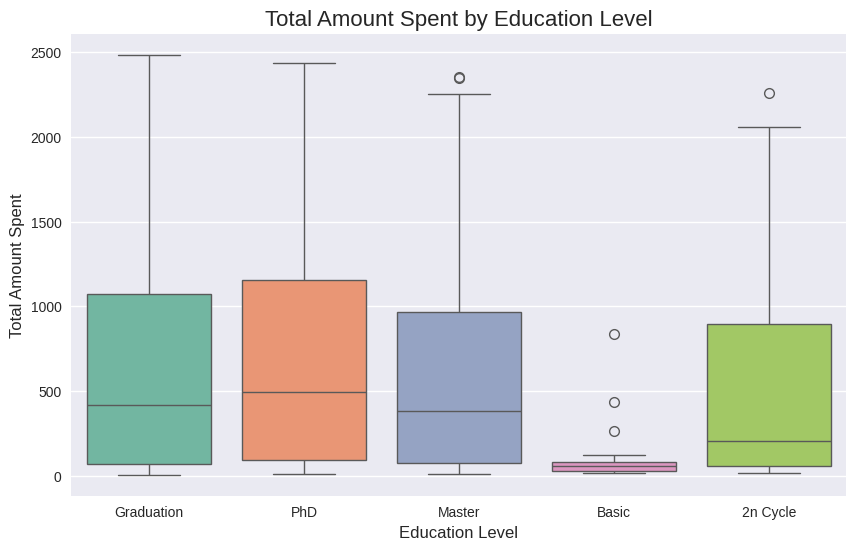

In [14]:
#What about the relation between Education and Total amount spent?
#Draw a suitable figure to answer the above question.
plt.figure(figsize=(10, 6))

#lets create a box plot to show the distribution of TotalAmountSpent across different education levels
sns.boxplot(data=df_cleaned, x='Education', y='TotalAmountSpent', palette='Set2')

plt.title('Total Amount Spent by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)

plt.show()


*Analyze the above and give your reasoning*

**Answer**:

Graduation, PhD, and 2nd Cycle:

With a median total spending between 500 and 1000 units and some outliers in the upper range, the spending distributions for customers with these three education levels are similar, indicating that some customers spend noticeably more than others with the same education level.

Master Level:

With a median of about 500 units, the distribution of customers holding a Master's degree is comparable to that of customers holding a PhD or graduating from college.
On the other hand, there are a few outliers in the higher spending range, and the range for Master's degree holders is more variable. There is greater variation in spending within this group, as indicated by the broader interquartile range (IQR).

Basic Education:

Consumers with basic education spend far less than those with more education.
In comparison to the other education categories, this category's total range is significantly narrower, with a very low median and a majority of consumers spending less than 500 units.
Though they are extremely uncommon, there are a few outliers that have spent noticeably more.

In conclusion, greater median spending and wider spending ranges are typically correlated with higher education levels, indicating larger spending potential. Consumers with a basic education spend less, and their distribution is more concentrated, which may indicate that they have a smaller budget or are not as inclined to spend. Spending on education normally rises with education level, with basic education spending being the lowest.

###Multivariate Analysis

Multivariate Analysis consists of understanding the relationship between two or more variables.

In [15]:
#Draw a scatter plot to check again the relation between income
#on the x-axis and amount spent on th y-axis
#In addition, add the education feature as a color to differentiate
#between the different points.

#we need to create a scatter plot with Income on the x-axis, TotalAmountSpent on the y-axis, and color based on Education level
fig = px.scatter(df_cleaned,
                 x='Income',
                 y='TotalAmountSpent',
                 color='Education',
                 title='Relationship between Income and Total Amount Spent with Education as Color',
                 labels={'Income': 'Customer Income', 'TotalAmountSpent': 'Total Amount Spent'},
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 trendline="ols")
fig.show()

**Comment on the Relationship between Income and Total Amount Spent with Education as Color:**

Positive Correlation:

Income and total spending have a positive association at all educational levels. The overall amount spent tends to rise in parallel with income, as seen by the patterns for each education level.

Education Level Differences:

Similar patterns are seen in the PhD and graduation groups, with spending rising noticeably in line with income. Spending increases with income are common among these education categories.

Master's degrees show a similar increasing trend, yet at lower income levels there seems to be a larger difference in cost.

Those with basic education tend to spend less even at higher income levels, as evidenced by the significantly flatter trendline and substantially lower overall spending.

Similar to the basic education group, the 2nd Cycle has comparatively lower investment across the board.

Concentration at Lower Income Levels:

The majority of the data points (below 60k) are concentrated in the lower income ranges. The maximum point density across all education levels can be shown here.
Customers with higher incomes (over 100k) are limited in number, and the majority of them have graduate and doctorate-level educations.

In summary, higher education levels influence spending behavior, with customers spending more as their income increases. Higher education levels also differentiate spending patterns, with lower education levels generally spending less. Both income and education are crucial in predicting customer spending.

#Clustering Time!

Once the analysis is complete, the subsequent step is to develop a model for segmenting the customers, using the KMeans model. KMeans is a widely used and effective segmentation model.
The KMeans model is an unsupervised machine learning algorithm that separates N observations into K clusters. The observations are grouped into these clusters based on their proximity to the centroid, which is the mean of that cluster.
By fitting the features into the model and specifying the desired number of clusters, the KMeans algorithm assigns a cluster label to each observation in the feature set.
When building a customer segmentation model using KMeans, there are no hard and fast rules for the number of features to include. However, it's advisable to use fewer features to enable easier interpretation and understanding of the segment outcomes.
In our case, we will initially construct the KMeans model with two features and then use three features in the final model. Before starting, it's important to consider the KMeans assumptions, which are:
* The features must be numerical.
* The features used in KMeans must follow a normal distribution because the algorithm calculates average distances, which can be affected by outliers. Skewed features must be transformed into a normal distribution using Numpy's logarithm transformation package, np.log().
* The features must be on the same scale. We will use the Scikit-learn StandardScaler() module to ensure that the features are normalized.

For our initial model, we will utilize the Income and TotalAmountSpent features.
Initially, we will fill the missing values in the Income feature with the median number before proceeding with the model.

In [16]:
#Fill in missing values of income with median

#calculate the median of the 'Income' column
income_median = df['Income'].median()

#now, fill the missing values in the 'Income' column with the calculated median
df['Income'].fillna(income_median, inplace=True)

#lets verify if there are still any missing values in 'Income'
print(df['Income'].isnull().sum())

0


In [17]:
#Assume you would like to work only with Income and TotalAmountSpent,
#define a new dataframe with only Income and TotalAmountSpent
df_income_spent = df[['Income', 'TotalAmountSpent']]

#print the first few rows of the new DataFrame to verify
print(df_income_spent.head())

    Income  TotalAmountSpent
0  58138.0              1617
1  46344.0                27
2  71613.0               776
3  26646.0                53
4  58293.0               422


After completing the filling of missing values, we will transform the features and store the output in a variable named data_log.

In [18]:
#Apply log transformation
import numpy as np

#apply log transformation to 'Income' and 'TotalAmountSpent' and store the result in 'data_log'
data_log = np.log(df_income_spent + 1)  # Adding 1 to avoid log(0) which is undefined

#print the first few rows of the transformed data
print(data_log.head())

      Income  TotalAmountSpent
0  10.970592          7.388946
1  10.743869          3.332205
2  11.179046          6.655440
3  10.190432          3.988984
4  10.973254          6.047372


Then we will scale the result using Scikit-learn StandardScaler():

In [19]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#apply the scaler to the log-transformed data
data_scaled = scaler.fit_transform(data_log)

#convert the result back into a DataFrame for better readability
data_scaled_df = pd.DataFrame(data_scaled, columns=['Income', 'TotalAmountSpent'])

#print the first few rows of the scaled data
print(data_scaled_df.head())

     Income  TotalAmountSpent
0  0.428874          1.202909
1 -0.021774         -1.556432
2  0.843209          0.703988
3 -1.121817         -1.109700
4  0.434166          0.290388


After completing the initial task, we can proceed to construct the model, specifically the KMeans model, which entails two essential parameters. The first parameter, random_state, ensures reproducible results, while the second parameter, n_clusters, determines the number of segments or clusters that will be created from KMeans.

In a business environment, the desired number of clusters for customer segmentation may be predetermined. However, in the absence of such prior knowledge, different cluster numbers must be tested to discover the optimal one.

Since we are not operating in a business environment, we will experiment with various cluster numbers. To select the best cluster, we will employ the elbow method, which involves plotting the error for each cluster and identifying a point on the graph where an elbow forms. Consequently, the ideal cluster will be the one that generates this elbow.

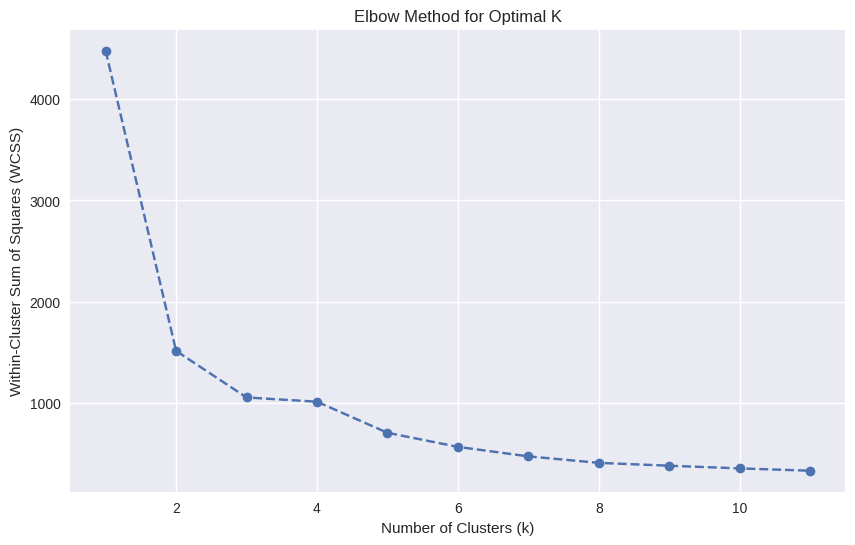

In [20]:
#Try value of k between 1 and 11 and plot the elbow method figure
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#create a list to store the within-cluster sum of squares (WCSS) for each k
wcss = []

#lets try k values from 1 to 11
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)  #inertia_ is the WCSS for the given k

#plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [21]:
#Now, build the KMeans model utilizing the best number of clusters
from sklearn.cluster import KMeans

#based on the elbow plot, the optimal number of clusters is = 3
optimal_clusters = 3

#make a copy of the dataFrame to work with an independent DataFrame
df_income_spent = df_income_spent.copy() #used this to avoid an error poping up

#initialize the KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)

#fit the model to the scaled data
kmeans_model.fit(data_scaled_df)

#get the cluster labels for each observation
cluster_labels = kmeans_model.labels_

#add the cluster labels to the DataFrame using .loc to avoid the warning
df_income_spent.loc[:, 'Cluster'] = cluster_labels

#print the first few rows of the DataFrame with the cluster labels
print(df_income_spent.head())


    Income  TotalAmountSpent  Cluster
0  58138.0              1617        1
1  46344.0                27        0
2  71613.0               776        1
3  26646.0                53        2
4  58293.0               422        1


After constructing the model, the subsequent step would involve interpreting the outcomes of each cluster. Various methods can be utilized to summarize the results of the clusters, depending on the desired objectives. The most prevalent method of summarization is the central tendency, which involves mean, median, and mode.

In our particular scenario, we will employ the median as our summarization method. This choice is due to the presence of outliers in the original features, which renders the mean overly sensitive to their influence. Consequently, we will aggregate the cluster labels and determine the median for Income and TotalAmountSpent. This can be accomplished using the Pandas groupby method.

Before using groupby and median, you have to assign the names of the columns to this new structure.

In [22]:
#use .assign(ClusterLabel = model.labels_)

df_with_clusters = df_income_spent.assign(ClusterLabel=cluster_labels)
print(df_with_clusters.head())

    Income  TotalAmountSpent  Cluster  ClusterLabel
0  58138.0              1617        1             1
1  46344.0                27        0             0
2  71613.0               776        1             1
3  26646.0                53        2             2
4  58293.0               422        1             1


In [23]:
#Use groupby and median

cluster_medians = df_with_clusters.groupby('ClusterLabel').median()[['Income', 'TotalAmountSpent']]

#print the median results for each cluster
print(cluster_medians)

               Income  TotalAmountSpent
ClusterLabel                           
0             42691.0             146.0
1             69084.0            1072.0
2             25282.0              43.0


*Analyze the clusters that you found in terms of median income and amount spent.*
Provide the best marketing strategy that you think will be successful for each cluster.

**Answer**:

Cluster 0:

Median Income: 42,691.0

Median Total Amount Spent: 146.0

Interpretation:

Customers with low spending but mid-level earnings are represented by this cluster. These clients might not be as interested in the company's goods or services, or they might be cautious with their money.

Marketing Strategy:

The cluster's sensitivity to price and value could be boosted by offering discounts, promotions, product awareness campaigns, and loyalty programs.

Cluster 1:

Median Income: 69,084.0

Median Total Amount Spent: 1,072.0

Interpretation:

Customers with higher incomes and spending levels are represented by this cluster. These are perhaps the most important clients a company has since they are more invested in the company and are prepared to make large purchases.

Marketing Strategy:

Target this cluster with premium products, exclusive memberships, and upsell/cross-sell opportunities to increase their spending and loyalty.

Cluster 2:

Median Income: 25,282.0

Median Total Amount Spent: 43.0

Interpretation:

Customers with very low spending and low incomes are represented by this cluster. These clients couldn't be extremely involved with the company, or they might not have the extra cash on hand to make significant purchases.

Marketing Strategy:

Target budget-friendly customers with affordable products, discounts, and entry-level options. Offer micro-purchasing options and basic loyalty rewards to encourage frequent purchases.

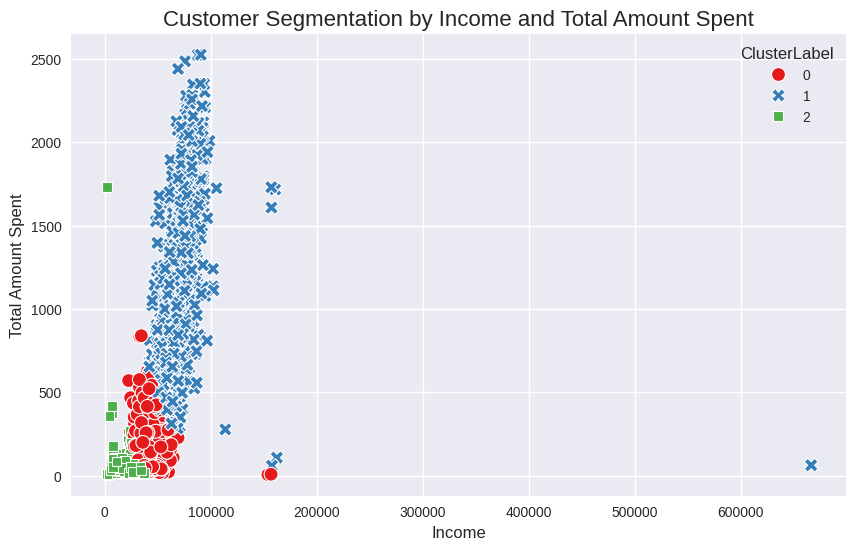

In [24]:
#Plot the clusters and differentiate each by a color
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#use Seaborn scatterplot to plot the clusters
sns.scatterplot(data=df_with_clusters,
                x='Income',
                y='TotalAmountSpent',
                hue='ClusterLabel',  #differentiate clusters by color
                palette='Set1',  #set1 provides distinct colors
                style='ClusterLabel',  #differentiate clusters by marker style
                s=100)  #set marker size

plt.title('Customer Segmentation by Income and Total Amount Spent', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)

plt.grid(True)
plt.show()

Repeat the above clustering while taking three features into consideration such as the age, income and amount spent. Interpret the clusters that you found and suggest marketing plans for each.

In [25]:
df_income_spent.loc[:, 'Age'] = current_year - df.loc[:, 'Year_Birth']
#check for missing values and fill them with median
age_median = df_income_spent['Age'].median()
df_income_spent.loc[:, 'Age'] = df_income_spent['Age'].fillna(age_median)

#create a new DataFrame with the three features: Age, Income, TotalAmountSpent
df_features = df_income_spent[['Age', 'Income', 'TotalAmountSpent']]

In [26]:
#log-transform the three features to handle skewness
import numpy as np
data_log_three_features = np.log(df_features + 1)

#scale the log-transformed features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled_three_features = scaler.fit_transform(data_log_three_features)


In [27]:
#build the KMeans model with 3 clusters
from sklearn.cluster import KMeans
optimal_clusters = 3
kmeans_model_three = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_model_three.fit(data_scaled_three_features)

KMeans(n_clusters=3, random_state=42)

In [28]:
#assign cluster labels to the original DataFrame
df_income_spent.loc[:, 'ClusterLabel_3Features'] = kmeans_model_three.labels_

#print the first few rows with the new cluster labels
print(df_income_spent[['Age', 'Income', 'TotalAmountSpent', 'ClusterLabel_3Features']].head())

   Age   Income  TotalAmountSpent  ClusterLabel_3Features
0   67  58138.0              1617                       1
1   70  46344.0                27                       0
2   59  71613.0               776                       1
3   40  26646.0                53                       0
4   43  58293.0               422                       2


In [29]:
#group by cluster and calculate the median for Age, Income, and TotalAmountSpent
cluster_medians_three = df_income_spent.groupby('ClusterLabel_3Features').median()[['Age', 'Income', 'TotalAmountSpent']]

#print the median results for each cluster
print("\nCluster Medians for Age, Income, and TotalAmountSpent:")
print(cluster_medians_three)


Cluster Medians for Age, Income, and TotalAmountSpent:
                         Age   Income  TotalAmountSpent
ClusterLabel_3Features                                 
0                       50.0  31801.0              54.0
1                       66.0  62807.0             820.0
2                       48.0  67419.0            1001.0


**Interpretation of the clusters found and marketing plans suggestions:**

Cluster 0:

Median Age: 50 years

Median Income: 31,801

Median Total Amount Spent: 54

Interpretation:
The people in this cluster are middle-aged, have very little money, and make very little purchases. These clients are probably more price conscious, and their decreased expenditure indicates an economical shopping style.


Marketing Strategy:
Target budget-friendly customers with affordable products, value-driven campaigns, and basic loyalty programs, focusing on cost savings, practicality, and engagement without overwhelming their budgets.

Cluster 1:

Median Age: 66 years

Median Income: 62,807

Median Total Amount Spent: 820

Interpretation:

This cluster consists of older people who have moderate spending habits and a higher income. These clients could have extra cash, but they might also be picky about what they buy.

Marketing Strategy:

Focus on premium offers with senior discounts, exclusive memberships, and tailored products to encourage spending, make customers feel valued, and cater to their comfort, health, and convenience preferences.

Cluster 2:

Median Age: 48 years

Median Income: 67,419

Median Total Amount Spent: 1,001

Interpretation:

The middle-aged population represented by this cluster has high incomes and high expenditure levels. Given their tendency to spend and their financial competence, these are perhaps the most valued clients.

Marketing Strategy:

Target luxury and high-value customers for luxury items, premium services, and exclusive offers. Utilize data for personalized recommendations and offer exclusive events, VIP programs, and exclusive experiences to boost brand loyalty.